In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read the files

In [13]:
sales = pd.read_csv('advertising.csv')
sales


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# head

In [14]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Tail

In [15]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


# cheak size and shape

In [16]:
sales.shape

(200, 4)

In [17]:
sales.size

800

# check information about dataset

In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# 

In [19]:
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### data does not have any missing values

## Find out the media which is best for advertising, that gives more sales

# 2. checking for duplicates


In [20]:
sales.duplicated().any()

False

# 3. Checking outliers
There are not extreme values present in dataset

In [21]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### conclusion-There are not extreme values present in dataset.bcz of this we cant handle outliers

# Univariate analysis

### check the sqewness
#### 1.Bar ploot
#### 2.hist plot
#### 3.dist plot

C:\Users\Pradnya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


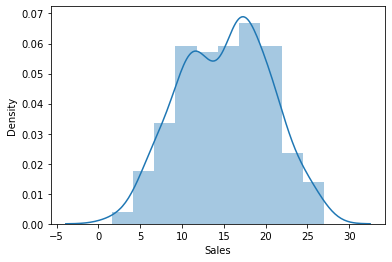

In [22]:
sns.distplot(sales['Sales']);   # Sales is target column

### Conclusion-It is normally distributed

# Bivariate analysis

## cheack the corelation between the columns
#### done by
#### 1.heat map
#### 2.pairplot
#### 3.box plot
#### 4.violin plot

In [23]:
df.corr()

NameError: name 'df' is not defined

In [ ]:
sns.pairplot(sales,height = 4,aspect=1);

1 parameter should be linear to the other


In [ ]:
sns.heatmap(sales.corr(),annot = True);

##Conclusion: TV seems to be most correlated with sales as 0.9 is very close to 1

# categorical data 
### handles by
#### 1. get_dummies
#### 2.Factorisation
#### 3.Encoders

## this dataset cant show categorical values

# Model Building

TV will be X data and Y will be sales ie. target column

### import model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##  select x and y

In [ ]:
#Step 1: select dependent and independent variables (ie. x and y)
#setting the value for x and y
#x = sales['TV'].values.reshape(-1,1)
x = sales[['TV']]
y = sales['Sales']

## bifurcation of data into train and test data
#### type of sampling:
##### 1.simple random
##### 2.clustering
##### 3.Stratified

In [ ]:
### Random sampling
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

# simple Linear Regression

In [ ]:
# Step 3: Model Instantiation
slr=LinearRegression()

In [ ]:
# Step 4: fit the model with train data
slr.fit(x_train,y_train)

In [ ]:
# Printing the model coefficients
print('Intercept:',slr.intercept_)
print('Coefficient:',slr.coef_)

In [ ]:
print('regression Equation: Sales = 6.99 + 0.05 *TV')

### line of best fit

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.99 + 0.05 * x_train,'r')
plt.show();

In [ ]:
# prediction of testand training set result
y_pred_slr = slr.predict(x_test)
#x_pred_slr = slr.predict(x_train)

In [ ]:
# actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head(5) 

In [ ]:
#Predict for any value
slr.predict([[56]])

In [ ]:
# predict the training and testing value by R2_Score

In [ ]:
from sklearn.metrics import r2_score
y_test_pred = slr.predict(x_test)

y_train_pred = slr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

Conclusion : 82.16% of the data fir the regression model

There is never 100% training or 100% testing

In [ ]:
### 0 means the model is perfect. therefore the value should be as close to 0 as possible

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqerr = metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr = np.sqrt(meanSqerr)
print('Mean Absolute Error:',meanAbErr)
print('mean Squared Error:',meanSqerr)
print('Root Mean Squared Error:',rootMeanSqErr)

# Multiple Linear Regression

In [ ]:
## setting the x and y value
x = sales[['TV','Radio','Newspaper']]
y = sales['Sales']

In [ ]:
#Step 2: bifurcation of data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

In [ ]:
# Printing the model coefficients
print('Intercept:',mlr.intercept_)
print('Coefficient:',mlr.coef_)

In [ ]:
y_pred_mlr = mlr.predict(x_test)

In [ ]:
y_pred_mlr

In [ ]:
# predict for any value
mlr.predict([[56,55,67]])

In [ ]:
from sklearn.metrics import r2_score
y_test_pred = mlr.predict(x_test)

y_train_pred = mlr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

## This condition shows the overfitting, so perform Regularisation Method

# standardisation

In [ ]:
# Target is no standardise

In [ ]:
X = sales.drop('Sales',axis=1)
y= sales['Sales']
X.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

# Regularisation methods

## L1 

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)

In [ ]:
lasso_reg.score(X_test, y_test)

In [ ]:
lasso_reg.score(X_train, y_train)

## L2

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

In [ ]:
ridge_reg.score(X_test, y_test)

In [ ]:
ridge_reg.score(X_train, y_train)